In [12]:
import pandas as pd
import numpy as np
import re

In [107]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [7]:
import os
os.getcwd()

'd:\\Python Scripts\\Razor Group Take-Home'

In [8]:
raw_data = pd.read_excel("Sample_Longlist_Data.xlsx")

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   category                                           1839 non-null   object        
 2   sellerlink                                         1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   sellerproductcount                                 1513 non-null   object        
 6   sellerratings                                      1411 non-null   object        
 7   sellerdetails                                      1812 non-null   object        
 8   seller business na

In [10]:
#1839 entries
#We have some missings in important variables like product count, ratings
#Examining raw data to spot erroneous values and understand object formats better
raw_data.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [225]:
##Pointers for cleaning data provided:
# The column sellerproductcount gives you the count of products in the form '1-16 of over 100,000 results' , and
# you can parse out the product count 100,000.
# • sellerratings - This columns gives you the % and count of positive ratings (e.g. 88% positive in the last 12 months
# (118 ratings) ) if parsed correctly.
# • sellerdetails - You can use this text to parse out phone numbers, and email IDs of merchants, where available, so
# our team can reach out to them.
# • businessaddress - This will give you the business locations of the sellers. You can parse them to identify if a seller
# is registered in the US , Germany (DE), or China (CN). Note that Razor does not acquire Chinese sellers at this
# point, so you can use this data to exclude sellers in China from your analysis.
# • Hero Product 1 #ratings and Hero Product 2 #ratings - these 2 columns give you the number of ratings of the 2
# 'hero products' or bestselling products of this seller.

In [11]:
df_processed = raw_data.copy()

In [ ]:
df_processed.drop_duplicates().shape

In [27]:
def get_count(mystr):
    val = re.search('(\d*,*\d*) results',mystr)
    if val is None:
        return 'Unable to parse'
    else:
        return val.group(0).replace(' results','').replace(",","")

In [28]:
df_processed['sellerproductcount_processed'] = df_processed['sellerproductcount'].astype(str).apply(get_count)

In [29]:
df_processed[['sellerproductcount','sellerproductcount_processed']].head(10)

,sellerproductcount,sellerproductcount_processed
0,"1-16 of over 100,000 results",100000
1,NaN,Unable to parse
2,"1-16 of over 2,000 results",2000
3,1-16 of 123 results,123
4,"1-16 of over 1,000 results",1000
5,1-16 of 28 results,28
6,"1-16 of over 4,000 results",4000
7,"1-16 of over 3,000 results",3000
8,1-16 of 133 results,133
9,"1-16 of over 3,000 results",3000


In [36]:
df_processed.loc[df_processed['sellerproductcount_processed'] == 'Unable to parse'].head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,sellerproductcount_processed
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,Unable to parse
19,2020-11-15,Garden,Seller 20,Seller 20-link,Seller 20-storefrontlink,NaN,76% positive in the last 12 months (3721 ratings),Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,Business Name:ABC-Schnäppchenmarkt GmbH,Jösser Weg10Petershagen32469DE,0,18,20,20,0,0,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann...,Unable to parse
21,2020-11-15,Garden,Seller 22,Seller 22-link,Seller 22-storefrontlink,NaN,92% positive in the last 12 months (181 ratings),Firmenwortlaut: GURU2016GmbH\n Geschäftsführun...,Business Name:GURU 2016 GmbH,"BAUGURU, GURU 2016 GmbHWarenannahme Vogl Bauma...",0,0,7,6,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,Unable to parse
27,2020-11-15,Garden,Seller 28,Seller 28-link,Seller 28-storefrontlink,NaN,86% positive in the last 12 months (21 ratings),Budify is committed to providing each customer...,Business Name:Adrián Aparicio Vera,"Calle Poeta Manuel Benítez Carrasco 32, 3 ASEV...",0,0,0,10,0,0,Visit the Wolfcraft Store,https://www.amazon.de/-/en/stores/Wolfcraft+Gm...,Unable to parse
29,2020-11-15,Garden,Seller 30,Seller 30-link,Seller 30-storefrontlink,NaN,75% positive in the last 12 months (596 ratings),Dataanalyst is committed to providing each cus...,Business Name:Shenzhenshi Longdan Keji Youxian...,Longgangqu Bantianjiedao NankengshequWuhedadao...,0,27,30,23,0,0,vidaXL,https://www.amazon.de/-/en/vidaXL/b/ref=bl_dp_...,Unable to parse


In [35]:
df_processed['sellerproductcount'].isna().sum()

326

In [ ]:
#Only 326 are unable to parse which are missing - proceeding to next step 
## SELLER RATINGS PROCESSING

In [45]:
df_processed['sellerratings'].head()

0    88% positive in the last 12 months (118 ratings)
1    90% positive in the last 12 months (566 ratings)
2     85% positive in the last 12 months (75 ratings)
3                                                 NaN
4     81% positive in the last 12 months (52 ratings)
Name: sellerratings, dtype: object

In [51]:
def get_rating_perc(mystr):
    val = re.search('(\d*)% positive',mystr)
    if val is None:
        return 'Unable to parse'
    else:
        return val.group(0).replace(' positive','').replace("%","")

def get_rating_count(mystr):
    val = re.search('(\d*) ratings',mystr)
    if val is None:
        return 'Unable to parse'
    else:
        return val.group(0).replace(' ratings','')

In [52]:
df_processed['sellerratings_perc_processed'] = df_processed['sellerratings'].astype(str).apply(get_rating_perc)

In [53]:
df_processed['sellerratings_count_processed'] = df_processed['sellerratings'].astype(str).apply(get_rating_count)

In [54]:
df_processed['sellerratings'].isna().sum()

428

In [55]:
(df_processed['sellerratings_perc_processed']=='Unable to parse').sum()

428

In [56]:
(df_processed['sellerratings_count_processed']=='Unable to parse').sum()

428

In [57]:
#Only NAs are missing
df_processed[["sellerratings","sellerratings_perc_processed","sellerratings_count_processed"]].head(20)

,sellerratings,sellerratings_perc_processed,sellerratings_count_processed
0,88% positive in the last 12 months (118 ratings),88,118
1,90% positive in the last 12 months (566 ratings),90,566
2,85% positive in the last 12 months (75 ratings),85,75
3,NaN,Unable to parse,Unable to parse
4,81% positive in the last 12 months (52 ratings),81,52
5,NaN,Unable to parse,Unable to parse
6,NaN,Unable to parse,Unable to parse
7,NaN,Unable to parse,Unable to parse
8,100% positive lifetime (4 total ratings),100,
9,NaN,Unable to parse,Unable to parse


In [59]:
df_processed['sellerdetails'][0]

'Lohas Living Inc James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807  Email Address:jadgemaello@gmail.com James Mazzello  US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 EIN:\xa030-0961431 \nThe European Commission provides for an Online Dispute Resolution Platform, which you can access here: https://ec.europa.eu/consumers/odr/\n\nPlease see the following link for the nationally appointed Alternative Dispute Resolution bodies contact details: https://webgate.ec.europa.eu/od...'

In [66]:
df_processed['sellerdetails'][1]

'Herzlich Willkommen im Amazon Shop von 1a-Handelsagentur. Für Fragen stehen wir Ihnen gerne unter der 039932-829721 zur Verfügung. Sie können auch direkt eine E-Mail an info@1a-handelsagentur.de schreiben. Anschrift\n1a-handelsagentur.de\nAndre Burmeister\nLindenallee 2\n17213 Malchow\xa0Kontakt\nTel.: 039932 - 829721\xa0\nFax.: 039932 – 81417\xa0\nE-Mail: info@1a-handelsagentur.de\nInternet: www.1a-handelsagentur.de\n\nUmsatzsteueridentnummer: DE 223758473 \nWir berechnen Ihnen folgende Versandkosten:(DE) Deutschland 0,00 E...'

In [61]:
df_processed['sellerdetails'][2]

'67878u6i7 is committed to providing each customer with the highest standard of customer service.'

In [70]:
df_processed['sellerdetails'][200]

'Impressum KTC Tec GmbH Herforder Straße 240 32120 Hiddenhausen Deutschland Telefon: 05221 - 93 915 90 Mail: info@ktc-tec.de Geschäftsführer: Kamil Thomas Cichon Handelsregister: Amtsgericht Bad Oeynhausen, HRB 15405 Umsatzsteuer-Identifikationsnummer: DE284159049 Die Europäische Kommission stellt eine Plattform zur Online-Streitbeilegung (OS) bereit, die Sie hier finden ec.europa.eu/consumers/odr/.Wir sind bereit, an einem außergerichtlichen Schlichtungsverfahren vor einer Verbraucherschlichtung...'

In [73]:
def get_email(mystr):
    val = re.search('[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+',mystr)
    if val is None:
        return "Unable to parse"
    else:
        return val.group(0)

In [74]:
df_processed['sellerdetails_email_processed'] = df_processed['sellerdetails'].astype(str).apply(get_email)

In [75]:
df_processed['sellerdetails_email_processed'].head(20)

0         jadgemaello@gmail.com
1     info@1a-handelsagentur.de
2               Unable to parse
3               Unable to parse
4               Unable to parse
5               Unable to parse
6               Unable to parse
7               Unable to parse
8               Unable to parse
9               Unable to parse
10              Unable to parse
11              Unable to parse
12              Unable to parse
13              Unable to parse
14       webmaster@9pm-store.de
15              Unable to parse
16              Unable to parse
17              Unable to parse
18              Unable to parse
19             abc-markt@web.de
Name: sellerdetails_email_processed, dtype: object

In [79]:
df_processed['businessaddress'][15]

'beilinqutaiyilumanchengguoji3haolou4lou10602shixianshishanxisheng710000CN'

In [80]:
df_processed['businessaddress_processed'] = df_processed['businessaddress'].astype(str).apply(lambda x: x[-2:])

In [82]:
df_processed['businessaddress_processed'].drop_duplicates()

0       US
1       DE
2       CN
5       an
20      IE
21      AT
27      ES
55      PL
65      GB
67      IT
78      FR
131     SE
187     HK
206     NL
250     TH
256     AU
309     BE
311     JP
388     CZ
600     IN
680     PT
1784    CH
Name: businessaddress_processed, dtype: object

In [83]:
df_processed.loc[df_processed['businessaddress_processed']=='an','businessaddress']

5       NaN
57      NaN
72      NaN
73      NaN
99      NaN
       ... 
1768    NaN
1772    NaN
1798    NaN
1813    NaN
1828    NaN
Name: businessaddress, Length: 75, dtype: object

In [84]:
df_processed['businessaddress_processed'] = np.where(df_processed['businessaddress_processed']=='an',np.nan,df_processed['businessaddress_processed'])

In [85]:
df_processed['businessaddress_processed'].drop_duplicates()

0        US
1        DE
2        CN
5       NaN
20       IE
21       AT
27       ES
55       PL
65       GB
67       IT
78       FR
131      SE
187      HK
206      NL
250      TH
256      AU
309      BE
311      JP
388      CZ
600      IN
680      PT
1784     CH
Name: businessaddress_processed, dtype: object

In [86]:
df_processed.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,sellerproductcount_processed,sellerratings_perc_processed,sellerratings_count_processed,sellerdetails_email_processed,businessaddress_processed
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,100000,88,118,jadgemaello@gmail.com,US
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,Unable to parse,90,566,info@1a-handelsagentur.de,DE
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,...,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,2000,85,75,Unable to parse,CN
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,...,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,123,Unable to parse,Unable to parse,Unable to parse,CN
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,...,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1000,81,52,Unable to parse,CN


In [87]:
df_processed.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'sellerratings',
       'sellerdetails', 'seller business name', 'businessaddress',
       'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL', 'sellerproductcount_processed',
       'sellerratings_perc_processed', 'sellerratings_count_processed',
       'sellerdetails_email_processed', 'businessaddress_processed'],
      dtype='object')

In [89]:
df_processed.isna().sum()

Date Added                                             0
category                                               0
sellerlink                                             0
sellerlink-url                                         0
sellerstorefront-url                                   0
sellerproductcount                                   326
sellerratings                                        428
sellerdetails                                         27
seller business name                                  56
businessaddress                                       75
Count of seller brands                                 0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
Hero Product 1 #ratings                                0
Hero Product 2 #ratings                                0
Sample brand name                                      4
Sample Brand URL               

In [90]:
#Some columns where we assigned unable to parse, now replace with np.nan and convert columns to int
cols = ['sellerproductcount_processed','sellerratings_perc_processed','sellerratings_count_processed','sellerdetails_email_processed']

for col in cols:
    df_processed[col] = np.where(df_processed[col]=='Unable to parse',np.nan,df_processed[col])


In [91]:
df_processed.isna().sum()

Date Added                                              0
category                                                0
sellerlink                                              0
sellerlink-url                                          0
sellerstorefront-url                                    0
sellerproductcount                                    326
sellerratings                                         428
sellerdetails                                          27
seller business name                                   56
businessaddress                                        75
Count of seller brands                                  0
Max % of negative seller ratings - last 30 days         0
Max % of negative seller ratings - last 90 days         0
Max % of negative seller ratings - last 12 months       0
Hero Product 1 #ratings                                 0
Hero Product 2 #ratings                                 0
Sample brand name                                       4
Sample Brand U

In [101]:
for col in df_processed:
    if df_processed[col].nunique()<20:
        print("Unique Values of {0}".format(col))
        print(df_processed[col].drop_duplicates())

Unique Values of Date Added
0   2020-11-15
Name: Date Added, dtype: datetime64[ns]
Unique Values of category
0    Garden
Name: category, dtype: object
Unique Values of Count of seller brands
0      16
1       0
2      15
3       1
5      13
6       6
9       4
11      5
13      3
17      9
20     14
34      2
40      8
50     11
76     10
84      7
138    12
Name: Count of seller brands, dtype: int64


In [113]:
#Some columns where we assigned unable to parse, now replace with np.nan and convert columns to int
cols = ['sellerproductcount_processed','sellerratings_perc_processed','sellerratings_count_processed']

for col in cols:
    df_processed[col] = df_processed[col].astype(float)


ValueError: could not convert string to float: ''

In [114]:
df_processed.iloc[:,5:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   sellerproductcount                                 1513 non-null   object 
 1   sellerratings                                      1411 non-null   object 
 2   sellerdetails                                      1812 non-null   object 
 3   seller business name                               1783 non-null   object 
 4   businessaddress                                    1764 non-null   object 
 5   Count of seller brands                             1839 non-null   int64  
 6   Max % of negative seller ratings - last 30 days    1839 non-null   int64  
 7   Max % of negative seller ratings - last 90 days    1839 non-null   int64  
 8   Max % of negative seller ratings - last 12 months  1839 non-null   int64  
 9   Hero Pro

In [118]:
df_processed.loc[df_processed['sellerratings_count_processed']=="",['sellerratings','sellerratings_count_processed']]

,sellerratings,sellerratings_count_processed
8,100% positive lifetime (4 total ratings),
10,100% positive lifetime (3 total ratings),
11,63% positive lifetime (8 total ratings),
12,0% positive lifetime (1 total ratings),
16,100% positive lifetime (2 total ratings),
...,...,...
1831,75% positive lifetime (4 total ratings),
1833,87% positive lifetime (15 total ratings),
1836,0% positive lifetime (1 total ratings),
1837,67% positive lifetime (3 total ratings),


In [121]:
df_processed['sellerratings'][1100:1150]

1100                                                 NaN
1101            100% positive lifetime (1 total ratings)
1102     81% positive in the last 12 months (16 ratings)
1103              0% positive lifetime (1 total ratings)
1104                                                 NaN
1105              0% positive lifetime (1 total ratings)
1106            85% positive lifetime (13 total ratings)
1107                                                 NaN
1108              0% positive lifetime (2 total ratings)
1109                                                 NaN
1110    100% positive in the last 12 months (14 ratings)
1111            100% positive lifetime (1 total ratings)
1112                                                 NaN
1113                                                 NaN
1114            100% positive lifetime (1 total ratings)
1115                                                 NaN
1116             67% positive lifetime (3 total ratings)
1117                           

In [ ]:
#I'd skipped this case and this is what's causing the issue - we need to add special provision for this


In [123]:
def get_rating_count_v2(mystr):
    val1 = re.search('(\d*) total ratings',mystr)
    val2 = re.search('(\d*) ratings',mystr)
    if val1 is None and val2 is None:
        return 'Unable to parse'
    elif val1 is None:
        return val2.group(0).replace(' ratings','')
    else:
        return val1.group(0).replace(' total ratings','')


In [129]:
df_processed['sellerratings']

0       88% positive in the last 12 months (118 ratings)
1       90% positive in the last 12 months (566 ratings)
2        85% positive in the last 12 months (75 ratings)
3                                                    NaN
4        81% positive in the last 12 months (52 ratings)
                              ...                       
1834     83% positive in the last 12 months (46 ratings)
1835                                                 NaN
1836              0% positive lifetime (1 total ratings)
1837             67% positive lifetime (3 total ratings)
1838            100% positive lifetime (2 total ratings)
Name: sellerratings, Length: 1839, dtype: object

In [130]:
df_processed['sellerratings'].astype(str).apply(get_rating_count_v2)

0                   118
1                   566
2                    75
3       Unable to parse
4                    52
             ...       
1834                 46
1835    Unable to parse
1836                  1
1837                  3
1838                  2
Name: sellerratings, Length: 1839, dtype: object

In [132]:
df_processed['sellerratings_count_processed']=df_processed['sellerratings'].astype(str).apply(get_rating_count_v2)

In [134]:
df_processed['sellerratings_count_processed'] = np.where(df_processed['sellerratings_count_processed']=='Unable to parse',np.nan,df_processed['sellerratings_count_processed'])

In [135]:
df_processed['sellerratings_count_processed'] = df_processed['sellerratings_count_processed'].astype(float)

In [136]:
df_processed.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,sellerproductcount_processed,sellerratings_perc_processed,sellerratings_count_processed,sellerdetails_email_processed,businessaddress_processed
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,100000.0,88.0,118.0,jadgemaello@gmail.com,US
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,NaN,90.0,566.0,info@1a-handelsagentur.de,DE
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,2000.0,85.0,75.0,NaN,CN
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,123.0,NaN,NaN,NaN,CN
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1000.0,81.0,52.0,NaN,CN


In [138]:
#About ratings on Amazon:
# Ratings meaning
# Positive feedback: 5 or 4 stars
# Neutral feedback: 3 stars
# Negative feedback: 2 or 1 stars
#Example:
#https://www.amazon.in/sp?marketplaceID=A21TJRUUN4KGV&seller=AXOGFIT0PZZ7G&isAmazonFulfilled=1&ref=dp_merchant_link


#https://sellercentral.amazon.com/gp/help/external/G97692EVY8H3CZY9?language=en_US&ref=efph_G97692EVY8H3CZY9_cont_171
# If you have more than 10 buyer feedbacks over the previous 12 months,
#  buyers will see your 12 month feedback rating and lifetime feedback 
# total ratings in the following format on the Offer Listings page:

# XX% positive over the past 12 months. (YYYY total ratings).

# If you have less than 10 buyer feedbacks in the previous 12 months, 
# or all of your feedbacks are in the past year, buyers will see your 
# lifetime feedback rating and lifetime feedback total ratings in the 
# following format on the Offer Listings page:

# XX% positive. (YYYY total ratings).

In [143]:
df_processed.sellerratings.iloc[0:50]

0      88% positive in the last 12 months (118 ratings)
1      90% positive in the last 12 months (566 ratings)
2       85% positive in the last 12 months (75 ratings)
3                                                   NaN
4       81% positive in the last 12 months (52 ratings)
5                                                   NaN
6                                                   NaN
7                                                   NaN
8              100% positive lifetime (4 total ratings)
9                                                   NaN
10             100% positive lifetime (3 total ratings)
11              63% positive lifetime (8 total ratings)
12               0% positive lifetime (1 total ratings)
13                                                  NaN
14     97% positive in the last 12 months (116 ratings)
15                                                  NaN
16             100% positive lifetime (2 total ratings)
17                                              

In [ ]:
#However output is different - the ratings and timeline are matching it seems
#i.e. if % is in last 12 months the ratings are also last 12 months and similarly for lifetime

In [139]:
#Based on this we can asssume if last 12 months rating is available, 
# seller had more than 10 feedbacks in last 12 months, otherwise, 
# if we have lifetime ratings it implies that <10 feedacks were received in last 12 months
df_processed['num_feedback_l12m'] = np.where(df_processed['sellerratings'].str.contains('lifetime',regex=False),"<10",">=10")

In [140]:
df_processed['sellerlink'].nunique()
#so we'll keep sellerlink as unique key of dataset and drop irrelevant columns

1839

In [141]:
df_processed.shape

(1839, 24)

In [153]:
#Exploratory Data Analysis Begin
df_processed.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url', 'sellerstorefront-url',
       'sellerproductcount', 'sellerratings', 'sellerdetails', 'seller business name',
       'businessaddress', 'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months', 'Hero Product 1 #ratings',
       'Hero Product 2 #ratings', 'Sample brand name', 'Sample Brand URL',
       'sellerproductcount_processed', 'sellerratings_perc_processed',
       'sellerratings_count_processed', 'sellerdetails_email_processed',
       'businessaddress_processed', 'num_feedback_l12m'],
      dtype='object')

In [164]:
import matplotlib.pyplot as plt
df_processed['Count of seller brands'].describe()

count    1839.000000
mean        6.951060
std         6.232073
min         0.000000
25%         1.000000
50%         5.000000
75%        15.000000
max        16.000000
Name: Count of seller brands, dtype: float64

In [1]:
#Sellers in Grocery category have on average 6-7 brands listed
df_processed[df_processed['Count of seller brands']==0].shape


NameError: name 'df_processed' is not defined

In [168]:
#337 of 1839 ~ 18% sellers have 0 brands listed
df_processed.loc[df_processed['Count of seller brands']!=0,'Count of seller brands'].mean()

8.510652463382158

In [166]:
#Excluding these, ~ 80% sellers have 1 or more brands with average being around 8 brands listed

(1839, 24)

<AxesSubplot:>

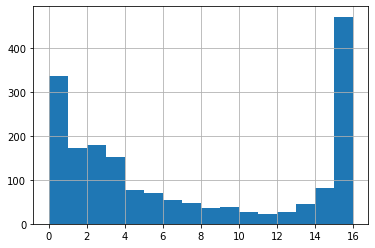

In [171]:
w=1
df_processed['Count of seller brands'].hist(bins = np.arange(0, 16 + w, w))

In [ ]:
df_processed['Count of seller brands'].hist(bins = np.arange(0, 16 + w, w))

In [186]:
(df_processed['Count of seller brands']==15).sum()

269

In [192]:
#Sellers either have <4 brands or >15 brands, mid tiers have lesser seller population 
((df_processed['Count of seller brands']>=15)|(df_processed['Count of seller brands']<=4)).sum()/df_processed.shape[0]

0.7558455682436107

In [198]:
#i.e. 75% seller population is either <4 brands or >15 brands
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   category                                           1839 non-null   object        
 2   sellerlink                                         1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   sellerproductcount                                 1513 non-null   object        
 6   sellerratings                                      1411 non-null   object        
 7   sellerdetails                                      1812 non-null   object        
 8   seller business na

In [197]:
df_processed.head(1)

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,sellerproductcount_processed,sellerratings_perc_processed,sellerratings_count_processed,sellerdetails_email_processed,businessaddress_processed,num_feedback_l12m
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,100000.0,88.0,118.0,jadgemaello@gmail.com,US,>=10


In [ ]:
#Checking if %  of negative seller ratings have correct range of values

In [194]:
var = 'Max % of negative seller ratings - last 30 days'
df_processed[var].describe()

count    1839.000000
mean        5.808592
std        18.117027
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: Max % of negative seller ratings - last 30 days, dtype: float64

In [195]:
var = 'Max % of negative seller ratings - last 90 days'
df_processed[var].describe()

count    1839.000000
mean        7.632409
std        19.902394
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       100.000000
Name: Max % of negative seller ratings - last 90 days, dtype: float64

In [196]:
var = 'Max % of negative seller ratings - last 12 months'
df_processed[var].describe()

count    1839.000000
mean       12.312670
std        23.435871
min         0.000000
25%         0.000000
50%         0.000000
75%        14.000000
max       100.000000
Name: Max % of negative seller ratings - last 12 months, dtype: float64

In [ ]:
# Seller feedback has to do with a buyer’s experience of the seller, such as with issues like:

# How quickly and thoroughly the seller answered questions about the product.
# What the shipping process was like, i.e. did it arrive by the expected delivery date, was the item well-packaged, what was the customer support like and how (or how fast) did the seller respond to concerns.
# Product reviews, on the other hand, tend to do with things like:

# The accuracy of the received product based on how it was described in the listing.
# The quality or usability of the product.
# Can be found on the product detail page.
# In essence, feedback has to do with the seller, while a product review doesn’t and only concerns the product.

#https://www.edesk.com/blog/seller-feedback-vs-product-reviews-on-amazon/
#Considering people pay enough attention to this difference

In [ ]:
###Looking at Razor's strategy
###We want to be able to find based on the following:
###1. Registered in US/DE
###2. Decent volume and positive reviews
###3. Medium sized player with growth potential to expand portfolio of brands/product line 

###1.#####.is straightforward, we'll put a flag for country

###2.a.### Good volume -> We can infer this from the following metrics:
# num_feedback_l12m
# sellerratings_count_processed 

###2.b.### Positive feedback -> We can infer this from the following metrics:
#Max % of negative seller ratings - last 30 days,last 90 days,last 12 months
#Although these are weak metrics as they talk about the MAX negative ratings,
# so there is chance of outliers
#Better metric is sellerratings_perc_processed along with sellerratings_count_processed that helps establish confidence

###3.a.### Size of player can be inferred from:
#sellerproductcount_processed i.e. no. of products listed on Amazon
#Count of seller brands   i.e. no. of brands whose products are listed

###3.b.### Below metrics help in identifying the type of products seller is selling- niche or popular products
# Hero Product 1 #ratings
# Hero Product 2 #ratings

#Combining these we can form a metric and do prioritization of best potential targets 



In [199]:
df_relevant = df_processed.copy()

In [200]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   category                                           1839 non-null   object        
 2   sellerlink                                         1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   sellerproductcount                                 1513 non-null   object        
 6   sellerratings                                      1411 non-null   object        
 7   sellerdetails                                      1812 non-null   object        
 8   seller business na

In [201]:
df_relevant['flag_country'] = np.where(df_relevant['businessaddress_processed'].isin(['US',"DE"]),1,0)

In [202]:
sum(df_relevant['flag_country'])

378

In [205]:
df_relevant = df_relevant.loc[df_relevant['flag_country']==1]

In [206]:
#That leaves us with 378 sellers
df_relevant.shape

(378, 25)

In [207]:
df_relevant.groupby('businessaddress_processed')['sellerratings_count_processed'].describe()

,count,mean,std,min,25%,50%,75%,max
businessaddress_processed,,,,,,,,
DE,362.0,638.245856,2202.530731,1.0,50.00,165.0,489.75,37124.0
US,14.0,90.142857,93.188690,10.0,31.25,43.5,118.75,294.0


In [ ]:
#Most of the players are from DE, and number of ratings are starkly different
#We'll flag #ratings between 50 and 75 percentile for DE and US separately to ensure decent volume and room to grow 

In [208]:
df_relevant['flag_volume'] = np.where(df_relevant['businessaddress_processed']=='DE',(df_relevant['sellerratings_count_processed']>165)&(df_relevant['sellerratings_count_processed']<489),
(df_relevant['sellerratings_count_processed']>43)&(df_relevant['sellerratings_count_processed']<118))

In [209]:
df_relevant['flag_volume'].sum()

91

In [210]:
df_relevant.groupby('businessaddress_processed')['sellerratings_count_processed'].describe()

,count,mean,std,min,25%,50%,75%,max
businessaddress_processed,,,,,,,,
DE,362.0,638.245856,2202.530731,1.0,50.00,165.0,489.75,37124.0
US,14.0,90.142857,93.188690,10.0,31.25,43.5,118.75,294.0


In [ ]:
#We have 30 ratings for 75% of the sellers which can be banked upon, we would have liked more, but for now let's take ratings for only these sellers to be reliable


In [212]:
df_relevant.loc[df_relevant['sellerratings_count_processed']>=30].shape

(308, 26)

In [213]:
df_relevant.loc[df_relevant['sellerratings_count_processed']>=30].groupby('businessaddress_processed')['sellerratings_perc_processed'].describe()

,count,mean,std,min,25%,50%,75%,max
businessaddress_processed,,,,,,,,
DE,298.0,94.208054,4.94042,70.0,92.0,95.5,97.00,100.0
US,10.0,86.900000,4.45845,79.0,85.0,87.0,90.25,94.0


In [214]:
#Although the mean itself is high in both - 84% and 94% positive ratings 
# are both pretty good- albeit 84% is slightly lower, to be more targetted and stringent
# let's take the 50-75 percentile i.e. around 90%-95%
df_relevant['flag_positive_rating'] = np.where((df_relevant['sellerratings_count_processed']>=30) & (df_relevant['sellerratings_perc_processed']>=92),1,0) 



In [217]:
df_relevant.shape

(378, 27)

In [216]:
df_relevant['sellerproductcount_processed'].describe()

count       316.000000
mean       6097.075949
std       17190.551377
min           5.000000
25%         226.750000
50%         832.500000
75%        3000.000000
max      100000.000000
Name: sellerproductcount_processed, dtype: float64

In [ ]:
#sellerproductcount_processed i.e. no. of products listed on Amazon
#Count of seller brands   i.e. no. of brands whose products are listed


In [218]:
df_relevant['Count of seller brands'].describe()

count    378.000000
mean      10.227513
std        6.533414
min        0.000000
25%        2.000000
50%       14.000000
75%       16.000000
max       16.000000
Name: Count of seller brands, dtype: float64

In [220]:
df_relevant['flag_mid_size'] = np.where((df_relevant['sellerproductcount_processed']>800)&(df_relevant['sellerproductcount_processed']<3000)|(df_relevant['Count of seller brands']>10)&(df_relevant['Count of seller brands']<15),1,0)

In [221]:
df_relevant['flag_mid_size'].sum()

122

In [222]:
df_relevant.shape

(378, 28)

In [223]:
df_relevant['Score'] = df_relevant['flag_volume'] + df_relevant['flag_positive_rating'] + df_relevant['flag_mid_size']


In [224]:
df_relevant.to_excel('Target List with Contacts- Score.xlsx')
#Here the ones with highest score are Priority 1 to be targetted  